In [ ]:
#i want to chcek student will place or not here

In [63]:
import numpy as np
import pandas as pd

In [64]:
df = pd.read_csv('placement.csv')

In [65]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [66]:
df.info() #there is no any missin values, all values are non null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [67]:
df.shape

(100, 4)

In [68]:
df = df.iloc[:,1:] #in preprocessing will only remove that first unwanted column ......here i want all rows but columns from 1 only. 


In [69]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [70]:
# Steps

# 0. Preprocess + EDA + Feature Selection 
#preprocess=(missing value,outlier, unnecessary column remove ), EDA=graphical representation of data ,
#feature selection=we dont use all columns in a input 
#now after this seperate your input and output part.
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split(cross validation)
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [71]:
import matplotlib.pyplot as plt


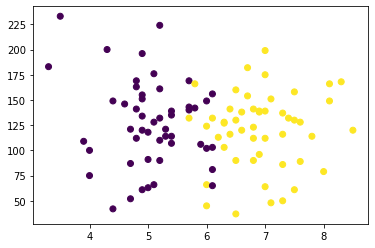

In [72]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
#color=df['placement']
#yelllow=placement done
#blue=placement not done 
#here we are going to use logistic regression model 

In [73]:
#will seperate here input and output values.

In [74]:
X = df.iloc[:,0:2] #now in that data set cpga and iq are input columns 
y = df.iloc[:,-1] #and only placement column is output column 

In [75]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [76]:
y.shape

(100,)

In [77]:
#now will do train test split
#will import sklearn

In [78]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)
#now here we can see test size is 0.1 ... it means 10% data is for test 

In [79]:
X_train

,cgpa,iq
1,5.9,106.0
37,8.1,149.0
47,5.2,161.0
40,4.9,134.0
41,5.4,114.0
...,...,...
61,7.3,137.0
79,6.5,90.0
4,5.8,142.0
50,3.5,233.0


In [80]:
y_train

1     0
37    1
47    0
40    0
41    0
     ..
61    1
79    1
4     0
50    0
73    0
Name: placement, Length: 90, dtype: int64

In [81]:
X_test

,cgpa,iq
36,5.7,140.0
99,6.2,113.0
17,3.3,183.0
65,8.1,166.0
70,6.3,127.0
11,6.9,138.0
2,5.3,121.0
85,5.8,166.0
9,5.1,66.0
55,7.8,114.0


In [82]:
#now will do scalling here. 


In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scaler = StandardScaler() #here will create object of that particular class 

In [124]:
X_train = scaler.fit_transform(X_train) #fit transform will first understand what exactly in that data then it will transform it.

In [125]:
X_train #now in stanadrdizing u will get all values between -1 to 1

array([[-0.0756444 , -0.40840212],
       [ 1.89509127,  0.65663575],
       [-0.70269666,  0.95385562],
       [-0.97143334,  0.28511091],
       [-0.52353887, -0.21025554],
       [-0.79227555,  0.13650098],
       [-0.52353887,  0.30987923],
       [ 0.90972344, -1.44867166],
       [-0.25480219,  0.23557427],
       [ 0.28267118, -0.48270708],
       [ 0.37225007, -0.16071889],
       [ 0.90972344,  1.30061213],
       [ 1.35761791,  0.18603762],
       [-1.06101223,  1.00339226],
       [ 1.4471968 , -0.8294636 ],
       [ 0.73056565, -0.25979218],
       [ 0.46182896,  0.9290873 ],
       [-1.77764339, -0.55701205],
       [ 0.10351339, -0.48270708],
       [-0.70269666, -0.80469528],
       [-0.25480219,  1.1520022 ],
       [-0.61311776, -0.21025554],
       [-1.24017002,  0.58233078],
       [ 0.37225007,  0.45848917],
       [ 0.73056565,  0.45848917],
       [-0.25480219,  0.50802581],
       [-1.41932781, -1.99357475],
       [ 2.25340685, -0.0616456 ],
       [ 0.73056565,

In [127]:
X_test = scaler.transform(X_test)  #now we undestnad pattern so we can simply use here tranform 

In [128]:
X_test

array([[-0.25480219,  0.43372085],
       [ 0.19309228, -0.23502386],
       [-2.40469564,  1.49875871],
       [ 1.89509127,  1.07769723],
       [ 0.28267118,  0.11173265],
       [ 0.82014454,  0.3841842 ],
       [-0.61311776, -0.03687728],
       [-0.16522329,  1.07769723],
       [-0.79227555, -1.39913502],
       [ 1.62635459, -0.21025554]])

In [129]:
from sklearn.linear_model import LogisticRegression #now we are going to use here logistic regression so will call that class

In [130]:
clf = LogisticRegression() #will create here 1 object clf
#now that clf has power to access function which is inside the logistregression class

In [131]:
# model training
clf.fit(X_train,y_train) 
#now here we use fit to train data , just u have to provide training data.
##now our model is trained 

LogisticRegression()

In [114]:
y_pred = clf.predict(X_test) #now will do ecvalution
y_pred

#this is the prediction

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [121]:
y_test
#this is the actual data for placement has done our not 
#this is actual data




36    0
99    1
17    0
65    1
70    1
11    1
2     0
85    1
9     0
55    1
Name: placement, dtype: int64

In [132]:
from sklearn.metrics import accuracy_score 
#to chcek accuracy between actual and prediction data

In [133]:
accuracy_score(y_test,y_pred) #you can see accuracy also between two points.
#so here we can say 9 /10 coreect means 9 data poin are matching with predicted.

0.9

In [ ]:
#how to plot the decision boundry
# it means what exactly pattern has notised by machine learning model, u can visualize this 
#for this we can use library mlextend
#mlxtend is ued to see decision boundry pattern.

In [15]:
import mlxtend

ModuleNotFoundError: No module named 'mlxtend'

In [13]:
from mlxtend.plotting import plot_decision_regions

ModuleNotFoundError: No module named 'mlxtend'

In [11]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

NameError: name 'plot_decision_regions' is not defined

In [ ]:
import pickle
#actually pickup convert object in file 
#in python every thing is in object ... here pckle convert that objcet in file. 

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))